In [38]:
import matplotlib as mpl
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#reading in data, input your own file directory
df = pd.read_csv("/Users/leannmclaren/Box Sync/Erdos Institute/2023_Erdos_Institute_Bootcamp_Education/Data/SRC2022/Annual Regents Exams Toy Example.csv")
df.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,YEAR,SUBJECT,SUBGROUP_NAME,TESTED,NUM_LEVEL1,PER_LEVEL1,NUM_LEVEL2,...,NUM_LEVEL5,PER_LEVEL5,NUM_PROF,PER_PROF,TOTAL_EXEMPT,NUM_EXEMPT_NTEST,PCT_EXEMPT_NTEST,NUM_EXEMPT_TEST,PCT_EXEMPT_TEST,ASSMNT_FLAG
0,8.000001e+11,151401040000,SCHROON LAKE CSD,2021,Regents Phy Set/Chemistry,Economically Disadvantaged,0,0,NaN,0,...,0,NaN,0,NaN,3.0,3.0,100.0,0.0,0.0,Y
1,8.000001e+11,151401040000,SCHROON LAKE CSD,2021,Regents Phy Set/Earth Sci,Economically Disadvantaged,12,1,08,6,...,0,00,5,42,12.0,3.0,25.0,9.0,75.0,NaN
2,8.000001e+11,151401040000,SCHROON LAKE CSD,2021,Regents US History&Gov't,Economically Disadvantaged,0,0,NaN,0,...,0,NaN,0,NaN,8.0,8.0,100.0,0.0,0.0,Y
3,8.000001e+11,151501060000,TICONDEROGA CSD,2021,Regents Common Core Algebra I,Male,3,s,s,s,...,s,s,s,s,11.0,8.0,73.0,3.0,27.0,NaN
4,8.000001e+11,151501060000,TICONDEROGA CSD,2021,Regents Common Core Algebra II,Male,0,0,NaN,0,...,0,NaN,0,NaN,1.0,1.0,100.0,0.0,0.0,Y


In [18]:
#exploring data

#looking at columns
df.columns

# Only subsetting to the variables I'm interested in 
df2 = df[['ENTITY_NAME','YEAR', 'SUBJECT', 'PER_PROF','SUBGROUP_NAME']]
#checking
df2.head()

#only doing chem regents exams
df3 = df2.loc[df2['SUBJECT'] == 'Regents Phy Set/Chemistry']
df3.head()

#looking at value counts
df3["PER_PROF"].value_counts()
# it seems that theres no percent proficiency calculated for for chemistry


,ENTITY_NAME,YEAR,SUBJECT,PER_PROF,SUBGROUP_NAME
0,SCHROON LAKE CSD,2021,Regents Phy Set/Chemistry,NaN,Economically Disadvantaged
16,All Public Schools,2021,Regents Phy Set/Chemistry,NaN,Migrant
27,All Public Schools,2021,Regents Phy Set/Chemistry,NaN,Economically Disadvantaged
38,All Public Schools,2021,Regents Phy Set/Chemistry,NaN,Not Economically Disadvantaged
49,All Public Schools,2021,Regents Phy Set/Chemistry,NaN,Not Migrant


In [36]:
#looking at scores among all students

#only doing chem regents exams
df3 = df2.loc[df2['SUBJECT'] == 'Regents Phy Set/Earth Sci']

#looking at all scores amongst all students
df5 = df2.loc[df2['SUBGROUP_NAME'] == 'All Students']
df5.head(500)

,ENTITY_NAME,YEAR,SUBJECT,PER_PROF,SUBGROUP_NAME
134,All Public Schools,2021,Regents US History&Gov't,NaN,All Students
135,All Public Schools,2021,Regents Phy Set/Physics,NaN,All Students
136,All Public Schools,2021,Regents Phy Set/Earth Sci,66,All Students
137,All Public Schools,2021,Regents Phy Set/Chemistry,NaN,All Students
138,All Public Schools,2021,Regents Living Environment,80,All Students
...,...,...,...,...,...
10331,ST. LAWRENCE County,2021,Regents Phy Set/Earth Sci,62,All Students
10332,ST. LAWRENCE County,2021,Regents Phy Set/Physics,NaN,All Students
10355,ST. LAWRENCE County,2021,Regents Phy Set/Chemistry,NaN,All Students
10420,ST. LAWRENCE County,2021,Regents Living Environment,78,All Students


In [37]:
#looking at value counts
df5["PER_PROF"].value_counts()

82    19
88    18
76    14
86    13
91    13
      ..
14     1
38     1
56     1
30     1
25     1
Name: PER_PROF, Length: 66, dtype: int64

TypeError: 'value' must be an instance of str or bytes, not a float

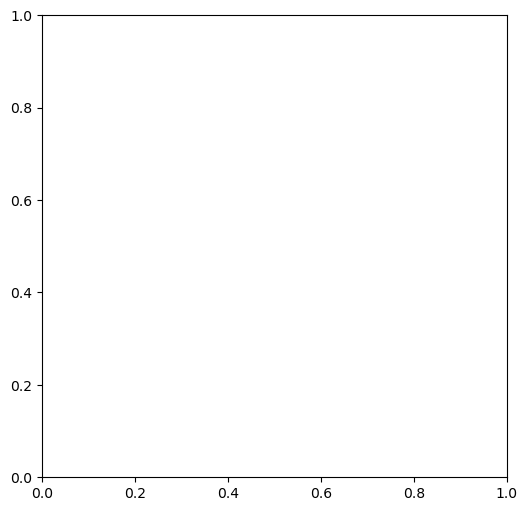

In [41]:
#scatterplot

plt.figure(figsize=(6,6))

plt.scatter(df5[],df5[])


## all you'll need is the figure name
## the default is to save the image as a png file
#plt.savefig("my_first_saved_fig.png", format="png")


plt.show()



TypeError: 'value' must be an instance of str or bytes, not a float

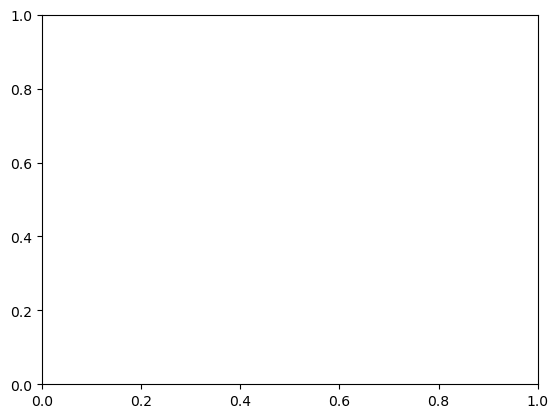

In [42]:
df5.plot.scatter(x = 'YEAR', y = 'PER_PROF')